In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
loan_df = pd.read_csv('loan_approval_dataset.csv')

# Clean column names by stripping leading/trailing whitespace
loan_df.columns = loan_df.columns.str.strip()

# Preprocessing
le = LabelEncoder()
loan_df['education'] = le.fit_transform(loan_df['education'])
loan_df['self_employed'] = le.fit_transform(loan_df['self_employed'])
loan_df['loan_status'] = le.fit_transform(loan_df['loan_status'])  # 1 for Approved, 0 for Rejected

# Features and target
X = loan_df.drop(columns=['loan_id', 'loan_status'])
y = loan_df['loan_status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluating both models
lr_accuracy = accuracy_score(y_test, y_pred_lr)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

# Classification reports
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

Logistic Regression Accuracy: 0.905152224824356
Decision Tree Accuracy: 0.977751756440281
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



Column Names: Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')
Missing values in y_test: 0


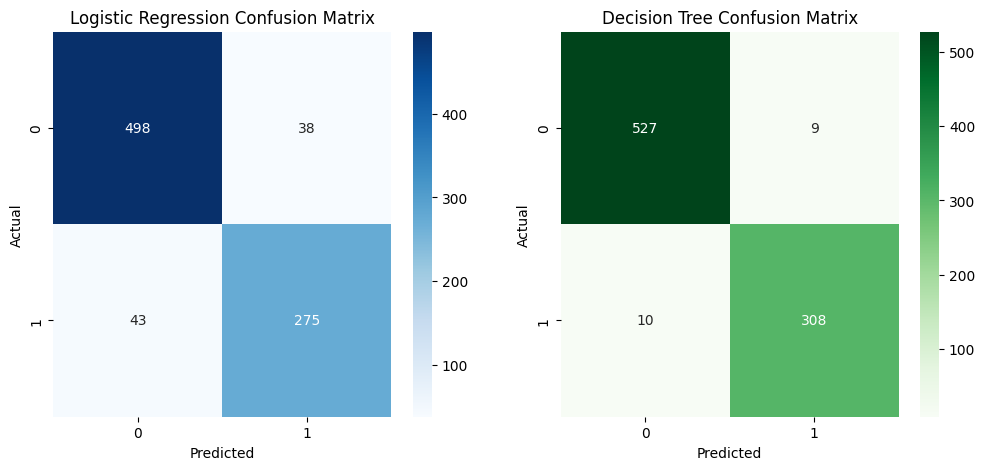

<ipython-input-14-32b138492636>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies_cleaned, palette='viridis')


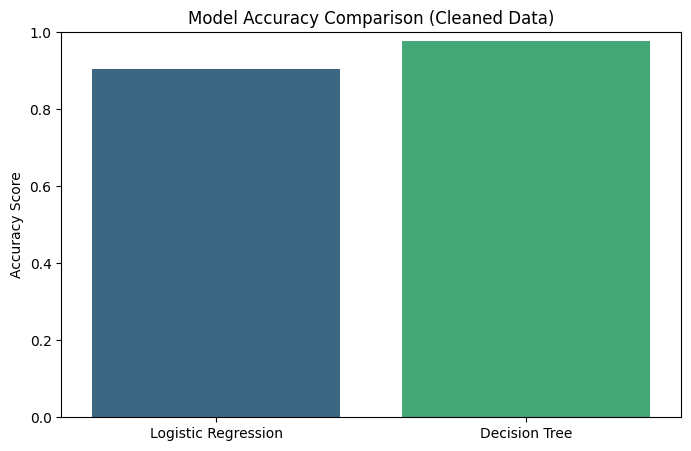

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



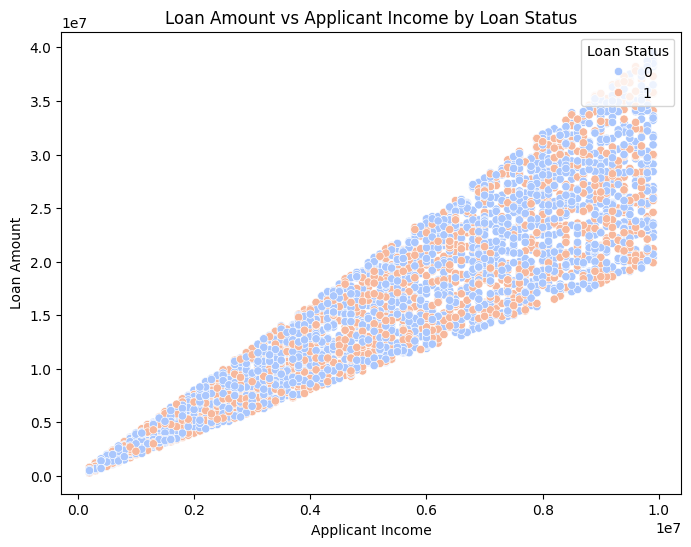

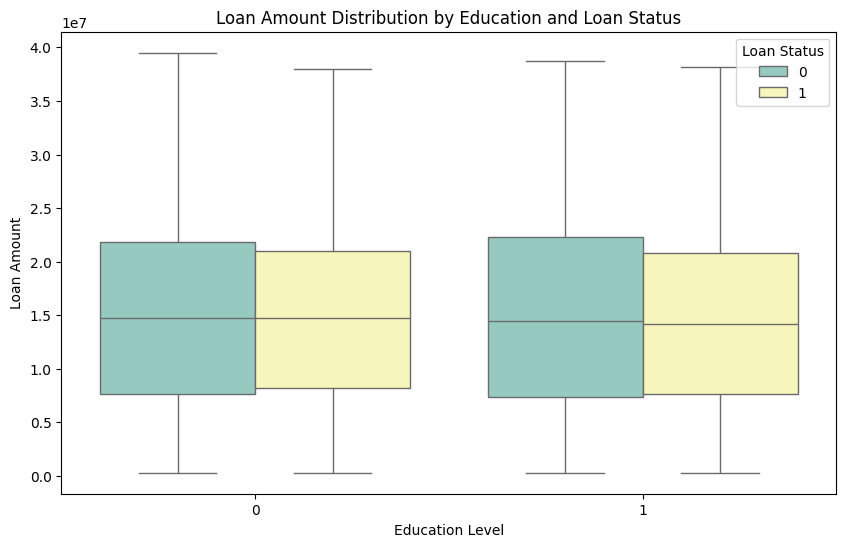

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
loan_df = pd.read_csv('loan_approval_dataset.csv')

# Clean column names by stripping leading/trailing whitespace
loan_df.columns = loan_df.columns.str.strip()

# Check the column names to find the correct one for 'applicant_income'
print("Column Names:", loan_df.columns)

# Preprocessing
le = LabelEncoder()
loan_df['education'] = le.fit_transform(loan_df['education'])
loan_df['self_employed'] = le.fit_transform(loan_df['self_employed'])
loan_df['loan_status'] = le.fit_transform(loan_df['loan_status'])  # 1 for Approved, 0 for Rejected

# Features and target
X = loan_df.drop(columns=['loan_id', 'loan_status'])
y = loan_df['loan_status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Handle NaN values in y_test
print("Missing values in y_test:", y_test.isnull().sum())

# Remove rows where target variable contains NaN values
X_test_cleaned = X_test[~pd.isnull(y_test)]
y_test_cleaned = y_test[~pd.isnull(y_test)]

# Re-run the predictions on the cleaned data
y_pred_lr_cleaned = lr_model.predict(X_test_cleaned)
y_pred_dt_cleaned = dt_model.predict(X_test_cleaned)

# Generate confusion matrices for cleaned data
cm_lr_cleaned = confusion_matrix(y_test_cleaned, y_pred_lr_cleaned)
cm_dt_cleaned = confusion_matrix(y_test_cleaned, y_pred_dt_cleaned)

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(cm_lr_cleaned, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Decision Tree Confusion Matrix
sns.heatmap(cm_dt_cleaned, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Decision Tree Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.show()

# Accuracy comparison
lr_accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_lr_cleaned)
dt_accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_dt_cleaned)

# Accuracy comparison bar chart
accuracies_cleaned = [lr_accuracy_cleaned, dt_accuracy_cleaned]
models = ['Logistic Regression', 'Decision Tree']

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies_cleaned, palette='viridis')
plt.title('Model Accuracy Comparison (Cleaned Data)')
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.show()

# Print classification reports
print("Logistic Regression Report:\n", classification_report(y_test_cleaned, y_pred_lr_cleaned))
print("Decision Tree Report:\n", classification_report(y_test_cleaned, y_pred_dt_cleaned))

# Scatter Plot: Visualizing relationships between loan amount and income based on loan status
# Replace 'applicant_income' with the correct column name from the dataset
correct_income_column = 'income_annum'  # Update this based on the column name found
plt.figure(figsize=(8, 6))
sns.scatterplot(x=loan_df[correct_income_column], y=loan_df['loan_amount'], hue=loan_df['loan_status'], palette='coolwarm')
plt.title('Loan Amount vs Applicant Income by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

# Box Plot: Visualizing distributions of loan amount by education level and loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='loan_amount', hue='loan_status', data=loan_df, palette='Set3')
plt.title('Loan Amount Distribution by Education and Loan Status')
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right')
plt.show()
